In this project I work with the mpg data set from seaborn. 

This dataset contains information about individual cars such as vehicle cylinders, horsepower, fuel consumption in miles per gallon (mpg), weight, etc. Let's load the data and for now just work with the 'weight' and 'mpg' columns.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
sns.set()

In [6]:
cars = sns.load_dataset('mpg')[['weight', 'mpg']]
print('cars data: {} rows, {} columns'.format(*cars.shape))
cars.head(3)

cars data: 398 rows, 2 columns


,weight,mpg
0,3504,18.0
1,3693,15.0
2,3436,18.0


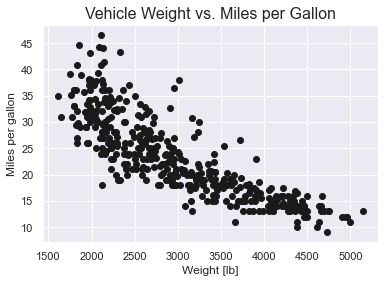

In [7]:
plt.scatter(cars['weight'], cars['mpg'], color='k')
plt.xlabel("Weight [lb]")
plt.ylabel("Miles per gallon")
plt.title("Vehicle Weight vs. Miles per Gallon", fontsize=16);

# PCA

In [8]:
cars.describe()

,weight,mpg
count,398.000000,398.000000
mean,2970.424623,23.514573
std,846.841774,7.815984
min,1613.000000,9.000000
25%,2223.750000,17.500000
50%,2803.500000,23.000000
75%,3608.000000,29.000000
max,5140.000000,46.600000


In [9]:
cars.var()

weight    717140.990526
mpg           61.089611
dtype: float64

In [10]:
cars.var()/cars.var().sum()

weight    0.999915
mpg       0.000085
dtype: float64

'weight' captures over 99.99% of the variance in the data

In [15]:
cars_full = sns.load_dataset('mpg')

In [16]:
cars_full.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Now I work with more features but 'origin' and 'name' are string-valued. 

I omit these columns because PCA can only handle numeric values.

In [17]:
cars_full = cars_full.drop(['origin', 'name'], axis=1)

In [18]:
cars_full.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
dtype: bool

In [21]:
cars_valid = cars_full.dropna()

In [23]:
cars_valid.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
dtype: bool

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

full_pipe = Pipeline([('standard_scaler', StandardScaler()),
                      ('pca', PCA(n_components=7))])

full_pipe.fit(cars_valid);

In [27]:
pca_full = full_pipe.named_steps['pca']

In [28]:
ratio_sum = pca_full.explained_variance_ratio_.cumsum()
ratio_sum

array([0.71580512, 0.83946103, 0.94351728, 0.96979087, 0.98720749,
       0.99495851, 1.        ])

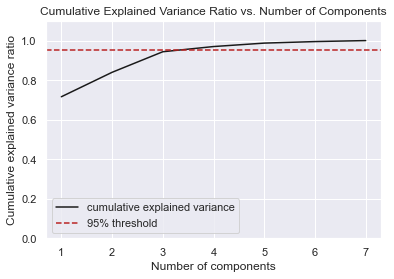

In [29]:
plt.ylim(0, 1.1)
plt.plot(range(1, 8), ratio_sum, 'k', label='cumulative explained variance')
plt.axhline(y=0.95, linestyle='--', color='#ba2121ff', label='95% threshold')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance ratio")
plt.title("Cumulative Explained Variance Ratio vs. Number of Components")
plt.legend();

In [30]:
full_pipe_95 = Pipeline([('standard_scaler', StandardScaler()),
                         ('pca', PCA(n_components=0.95))])

full_pipe_95.fit(cars_valid);

In [31]:
pca95 = full_pipe_95.named_steps['pca']
pca95.n_components_

4

In [32]:
components = pd.DataFrame(pca95.components_.round(2), columns=cars_valid.columns)
components

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,-0.40,0.42,0.43,0.42,0.41,-0.28,-0.23
1,-0.21,-0.20,-0.18,-0.09,-0.22,0.01,-0.91
2,-0.26,0.14,0.10,-0.17,0.28,0.89,-0.04
3,0.75,0.48,0.30,-0.04,-0.11,0.12,-0.30
